### Effectiveness Analysis of the Recent Campaign launched by a Company

#### Step 1: Load Data

In [2]:
import pandas as pd

user_interaction = pd.read_csv('../Campaign Performance Analysis/UserInteractions.csv')
user_interaction.head()

,Customer ID,Interaction Date,Interaction Type,Interaction Channel
0,1,2/28/2024,share,website
1,2,4/27/2024,view,social media
2,3,2/26/2024,share,email
3,4,2/13/2024,click,email
4,5,4/1/2024,share,social media


In [4]:
sales_transaction = pd.read_csv('../Campaign Performance Analysis/SalesTransactions.csv')
sales_transaction.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity
0,1,1/19/2024,213,345,Books,295.15,7
1,2,6/11/2024,59,134,Electronics,457.78,1
2,3,1/10/2024,178,89,Electronics,423.84,2
3,4,5/30/2024,359,423,Home & Kitchen,497.52,1
4,5,3/21/2024,384,139,Clothing,164.21,7


In [6]:
customer_demographic = pd.read_csv('../Campaign Performance Analysis/CustomerDemographics.csv')
customer_demographic.head()

,Customer ID,Age,Gender,Location,Income Level
0,1,65,Male,Martinezmouth,61083
1,2,43,Non-binary,South Anne,90419
2,3,58,Non-binary,West Darrellport,38260
3,4,53,Non-binary,Stevenshire,34649
4,5,69,Female,South Kellychester,70420


#### Step 2: Clean the Data

##### i) Check if the numeric & string columns are assigned incorrect datatypes [This can cause problems while processing data for Analysis]

In [8]:
user_interaction.dtypes

Customer ID             int64
Interaction Date       object
Interaction Type       object
Interaction Channel    object
dtype: object

In [10]:
#Interaction Date is set to object type but should rather be datetime
user_interaction['Interaction Date']=user_interaction['Interaction Date'].astype('datetime64[ns]')
user_interaction.dtypes

Customer ID                     int64
Interaction Date       datetime64[ns]
Interaction Type               object
Interaction Channel            object
dtype: object

In [11]:
sales_transaction.dtypes

Transaction ID        int64
Transaction Date     object
Customer ID           int64
Product ID            int64
Product Category     object
Sales Amount        float64
Quantity              int64
dtype: object

In [16]:
#Again change the datatype for Transaction Date to Datetime
sales_transaction['Transaction Date'] = sales_transaction['Transaction Date'].astype('datetime64[ns]')
sales_transaction.dtypes

Transaction ID               int64
Transaction Date    datetime64[ns]
Customer ID                  int64
Product ID                   int64
Product Category            object
Sales Amount               float64
Quantity                     int64
dtype: object

In [17]:
customer_demographic.dtypes

Customer ID      int64
Age              int64
Gender          object
Location        object
Income Level     int64
dtype: object

##### ii) Handle Null/Missing Values

In [22]:
print(user_interaction.shape)
user_interaction.isnull().sum()

(1000, 4)


Customer ID             0
Interaction Date        0
Interaction Type        0
Interaction Channel    11
dtype: int64

In [24]:
#11 out 1000 rows have NULL for Interaction Channel which is a catagorical Data field
#Solution - Replace the Missing fileds with the most representative values as the number of such fileds
#are less compared to the total sample size
user_interaction['Interaction Channel'].value_counts()

website         334
email           329
social media    326
Name: Interaction Channel, dtype: int64

In [31]:
#Website is ti the most representative value. So, replace NaN's with 'Website'
user_interaction['Interaction Channel'].fillna('website',inplace=True)
user_interaction.isnull().sum()
#No Null Values in this dataset anymore

Customer ID            0
Interaction Date       0
Interaction Type       0
Interaction Channel    0
dtype: int64

In [32]:
sales_transaction.isnull().sum()

Transaction ID      0
Transaction Date    0
Customer ID         0
Product ID          0
Product Category    0
Sales Amount        0
Quantity            0
dtype: int64

In [33]:
customer_demographic.isnull().sum()

Customer ID     0
Age             0
Gender          0
Location        0
Income Level    0
dtype: int64

#### Step 3: Analysis

##### Problem 1- Determine User Engagement Rate

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

#Find Total Interaction
total_interactions = user_interaction.shape
print("Total Interactions: ",total_interactions[0])
unique_customer_interactions = user_interaction['Customer ID'].nunique()
print("Unique Customer Interactions: ",unique_customer_interactions)
target_engagement=1500
engagement_rate = (unique_customer_interactions/target_engagement)*100
print(f"User Engagement Rate: {'%.2f'%engagement_rate}%")

Total Interactions:  1000
Unique Customer Interactions:  1000
User Engagement Rate: 66.67%


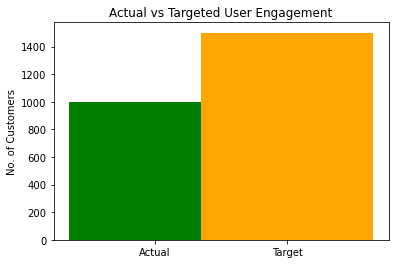

In [83]:
barch = plt.bar(['Actual','Target'],[unique_customer_interactions,1500], color='orange',width=1.3)
barch[0].set_color('green')
plt.title("Actual vs Targeted User Engagement")
plt.ylabel("No. of Customers")
plt.show()
#Target hasn't been achieved in terms of expected engagement

In [50]:
#Channel-wise interaction %
channel_interactions = (user_interaction['Interaction Channel'].value_counts()/total_interactions[0])*100
channel_interactions

website         34.5
email           32.9
social media    32.6
Name: Interaction Channel, dtype: float64

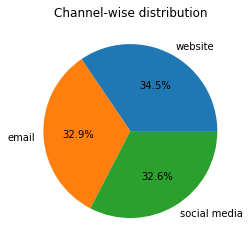

In [64]:
plt.pie(channel_interactions,labels=channel_interactions.index,autopct='%.1f%%')
plt.title("Channel-wise distribution")
plt.show()

In [65]:
#Mode-wise Interaction %
type_interactions = (user_interaction['Interaction Type'].value_counts()/total_interactions[0])*100
type_interactions

share    35.6
click    32.6
view     31.8
Name: Interaction Type, dtype: float64

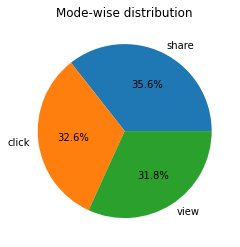

In [67]:
plt.pie(type_interactions,labels=type_interactions.index,autopct='%.1f%%')
plt.title("Mode-wise distribution")
plt.show()

##### Problem 2- Determine how many Users converted to Customers

In [89]:
#Consider the customers common in Sales and User Interaction tables
#Merge tables based on common Customer ID
cust_conversion = sales_transaction.merge(user_interaction, on='Customer ID', how='inner')
cust_conversion.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity,Interaction Date,Interaction Type,Interaction Channel
0,1,2024-01-19,213,345,Books,295.15,7,2024-04-22,view,email
1,656,2024-02-10,213,99,Toys,94.82,7,2024-04-22,view,email
2,823,2024-06-24,213,362,Toys,13.47,6,2024-04-22,view,email
3,1177,2024-01-15,213,89,Electronics,475.05,4,2024-04-22,view,email
4,2,2024-06-11,59,134,Electronics,457.78,1,2024-04-16,view,email


In [94]:
#Filter the customers who purchased after their interaction with the Company's campaign
cust_conversion=cust_conversion[cust_conversion['Transaction Date']>=cust_conversion['Interaction Date']]
#Find the number of unique customers from the filtered list - they've been converted after engagement
converted_cust = cust_conversion['Customer ID'].nunique()
print(converted_cust)

419


#### Calculate Conversion Rate

In [103]:
e_conversion_rate = (converted_cust/unique_customer_interactions)*100
print(f"Engaged Customer Conversion Rate: {'%.1f'%e_conversion_rate} %")
#Targeted coversion rate is 35% of 1500 engaged customers
t_conversion_rate = (converted_cust/1500)*100
print(f"Conversion rate based on targeted engagement: {round(t_conversion_rate,2)} %")
#We haven't achieved the expected Customer numbers who made a purchase after engaging with the campaign

Engaged Customer Conversion Rate: 41.9 %
Conversion rate based on targeted engagement: 27.93 %


##### Problem 3 - Determine the impact of campaign on Sales numbers

In [105]:
#Campaign Duration: 1 Jan,2024 - 30 Apr,2024
print(f"Earliest Sales date: {min(sales_transaction['Transaction Date'])}")
print(f"Latest Sales date: {max(sales_transaction['Transaction Date'])}")

Earliest Sales date: 2024-01-01 00:00:00
Latest Sales date: 2024-07-06 00:00:00


In [106]:
sales_transaction.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity
0,1,2024-01-19,213,345,Books,295.15,7
1,2,2024-06-11,59,134,Electronics,457.78,1
2,3,2024-01-10,178,89,Electronics,423.84,2
3,4,2024-05-30,359,423,Home & Kitchen,497.52,1
4,5,2024-03-21,384,139,Clothing,164.21,7


In [110]:
#Calculate Total Sales per transaction by multiplying Sales Amount with Quantity
#Add new column Sales
sales_transaction['Sales'] = sales_transaction['Sales Amount']*sales_transaction['Quantity']
sales_transaction.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity,Sales
0,1,2024-01-19,213,345,Books,295.15,7,2066.05
1,2,2024-06-11,59,134,Electronics,457.78,1,457.78
2,3,2024-01-10,178,89,Electronics,423.84,2,847.68
3,4,2024-05-30,359,423,Home & Kitchen,497.52,1,497.52
4,5,2024-03-21,384,139,Clothing,164.21,7,1149.47


In [112]:
#Extract month from Transaction Date
sales_transaction['Month'] = sales_transaction['Transaction Date'].dt.month
sales_transaction.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity,Sales,Month
0,1,2024-01-19,213,345,Books,295.15,7,2066.05,1
1,2,2024-06-11,59,134,Electronics,457.78,1,457.78,6
2,3,2024-01-10,178,89,Electronics,423.84,2,847.68,1
3,4,2024-05-30,359,423,Home & Kitchen,497.52,1,497.52,5
4,5,2024-03-21,384,139,Clothing,164.21,7,1149.47,3


In [119]:
#Sales during campaign
sales_dur_camp = round(sum(sales_transaction[sales_transaction['Month']<5]['Sales']),2)
print(f"Sales during Campaign period: {sales_dur_camp}")
sales_after_camp = round(sum(sales_transaction[sales_transaction['Month']>=5]['Sales']),2)
print(f"Sales after Campaign period: {sales_after_camp}")

Sales during Campaign period: 1308551.48
Sales after Campaign period: 637323.82


In [122]:
#Calculate the Sales Growth during campaign
sales_growth = ((sales_dur_camp - sales_after_camp)/sales_after_camp)*100
print(f"Sales growth during Campaign: {round(sales_growth,2)}%")
#Sales increased during the Campaign period

Sales growth during Campaign: 105.32%


##### Problem 4: Calculate ROI on the Campaign & compare with the previous one

In [125]:
#Calculate ROI on the revenue generated by the campaign
#Re-utilize the Sales and Interaction merged table here
#The idea is to find ales generated from users during the campaign after they interacted with the Campaign material
cust_conversion.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity,Interaction Date,Interaction Type,Interaction Channel
2,823,2024-06-24,213,362,Toys,13.47,6,2024-04-22,view,email
4,2,2024-06-11,59,134,Electronics,457.78,1,2024-04-16,view,email
5,486,2024-06-23,59,499,Electronics,256.80,3,2024-04-16,view,email
6,3,2024-01-10,178,89,Electronics,423.84,2,2024-01-02,click,website
9,5,2024-03-21,384,139,Clothing,164.21,7,2024-02-15,share,email


In [127]:
#Calculate Sales for each transaction
cust_conversion["Sales"] = cust_conversion["Sales Amount"]*cust_conversion["Quantity"]
cust_conversion.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity,Interaction Date,Interaction Type,Interaction Channel,Sales
2,823,2024-06-24,213,362,Toys,13.47,6,2024-04-22,view,email,80.82
4,2,2024-06-11,59,134,Electronics,457.78,1,2024-04-16,view,email,457.78
5,486,2024-06-23,59,499,Electronics,256.80,3,2024-04-16,view,email,770.40
6,3,2024-01-10,178,89,Electronics,423.84,2,2024-01-02,click,website,847.68
9,5,2024-03-21,384,139,Clothing,164.21,7,2024-02-15,share,email,1149.47


In [144]:
revenue_thru_camp = sum(cust_conversion[(cust_conversion['Transaction Date']>cust_conversion['Interaction Date']) & (cust_conversion['Transaction Date']<='2024-04-30')]['Sales'])
print(f"Revenue generated through campaign: ${round(revenue_thru_camp,2)}")
print("Revenue generated through last campaign: $268000")

Revenue generated through campaign: $467310.38
Revenue generated through last campaign: $268000


In [149]:
#ROI = ((Revenue - Budget)/Budget)*100
curr_camp_roi = ((revenue_thru_camp - 50000)/50000)*100
print(f"ROI on current Campaign: {round(curr_camp_roi,2)} %")
prev_camp_roi = ((268000-57000)/57000)*100
print(f"ROI on previous Campaign: {round(prev_camp_roi,2)} %")
#This Campaign has given a better return on Investments than the previous one

ROI on current Campaign: 834.62 %
ROI on previous Campaign: 370.18 %
